In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [2]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
name=['age','workclass',
       'fnlwgt','education',
       'education-num','marital-status','occupation'
       ,'relationship','race','sex','capital-gain',
       'capital-loss','hours-per-week','native-country','salary']
df= pd.read_csv(url,', ',names=name,engine='python')
print(df.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country salary  
0          2174             0              40  United-States  <=50K  
1             0             0             

# Deskripsi Data numerik

In [3]:
# df.to_excel('data.xlsx')
df['hours-per-week'].unique()

array([40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95])

In [4]:
df.isnull().sum()
df['education'].unique()


array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fafb743a110>,
      dtype=object)

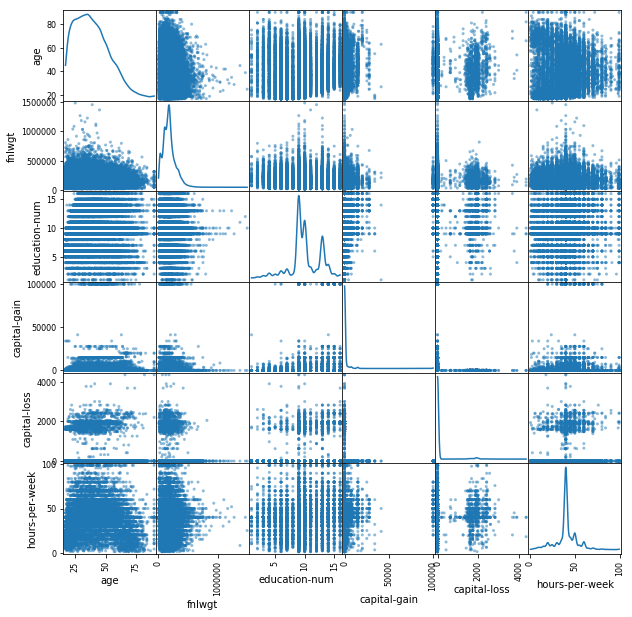

In [6]:
scatter_matrix(df,diagonal='kde', figsize=(10,10))

In [7]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [8]:
# Membuat two-way table antar variabel 'Gender' dan 'Student'
pd.crosstab(df.education, df.sex,margins=True)

sex,Female,Male,All
education,,,
10th,295,638,933
11th,432,743,1175
12th,144,289,433
1st-4th,46,122,168
5th-6th,84,249,333
7th-8th,160,486,646
9th,144,370,514
Assoc-acdm,421,646,1067
Assoc-voc,500,882,1382


In [10]:
# Membuat two-way table antar variabel 'Gender' dan 'Student'
x=pd.crosstab(df.education, df.sex, margins = True)
# membuat matrix observed
x.columns = ["Male","Female","row_totals"]

x.index = ['10','11','12','1-4','5-6','7-8','9','assoc-acdm','assoc-voc','bachelors','doctorate','hs-grad','masters','preschool','prof-school','some-college','col_totals']

observed = x.iloc[0:16,0:2]   # Get table without totals for later use
observed

,Male,Female
10,295,638
11,432,743
12,144,289
1-4,46,122
5-6,84,249
7-8,160,486
9,144,370
assoc-acdm,421,646
assoc-voc,500,882
bachelors,1619,3736


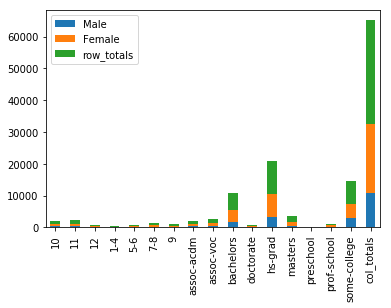

In [11]:
x.plot.bar(stacked=True)

In [12]:
# Membuat matrix expected
expected =  np.outer(x["row_totals"][0:16],
                     x.loc["col_totals"][0:2]) / 32561 #400 jumlah sample datanya

expected = pd.DataFrame(expected)

expected.columns = ["Male","Female"]
expected.index = ['10','11','12','1-4','5-6','7-8','9','assoc-acdm','assoc-voc','bachelors','doctorate','hs-grad','masters','preschool','prof-school','some-college']

expected

,Male,Female
10,308.631277,624.368723
11,388.683548,786.316452
12,143.234022,289.765978
1-4,55.573477,112.426523
5-6,110.154571,222.845429
7-8,213.693253,432.306747
9,170.028378,343.971622
assoc-acdm,352.957741,714.042259
assoc-voc,457.158011,924.841989
bachelors,1771.404594,3583.595406


In [13]:
# Hitung chi-square statistik
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()

print(chi_squared_stat)

297.71500372503687


In [14]:
import scipy.stats as stats
# Hitung critical value
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 1)   # *

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=1)
print("P value")
print(p_value)

Critical value
3.841458820694124
P value
0.0


In [15]:
# Cara lain: menggunakan package stats
stats.chi2_contingency(observed= observed) #maksudnya??

(297.71500372503687,
 1.667778440920507e-54,
 15,
 array([[ 308.63127668,  624.36872332],
        [ 388.6835478 ,  786.3164522 ],
        [ 143.2340223 ,  289.7659777 ],
        [  55.57347747,  112.42652253],
        [ 110.15457142,  222.84542858],
        [ 213.69325266,  432.30674734],
        [ 170.02837751,  343.97162249],
        [ 352.95774086,  714.04225914],
        [ 457.15801112,  924.84198888],
        [1771.40459445, 3583.59540555],
        [ 136.61813212,  276.38186788],
        [3473.67313657, 7027.32686343],
        [ 569.95893861, 1153.04106139],
        [  16.87051995,   34.12948005],
        [ 190.53763705,  385.46236295],
        [2411.82276343, 4879.17723657]]))

In [16]:
# Membuat two-way table antar variabel 'Gender' dan 'Student'
s=pd.crosstab(df.salary, df.sex, margins=True)

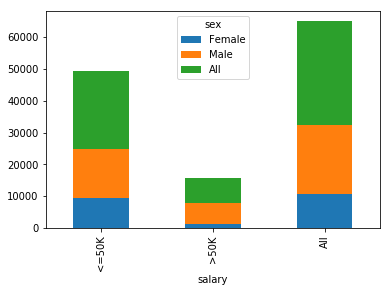

In [17]:
s.plot.bar(stacked=True)

In [18]:
# Membuat two-way table antar variabel 'Gender' dan 'Student'
s=pd.crosstab(df.salary, df.sex, margins = True)
# membuat matrix observed
s.columns = ["Male","Female","row_totals"]

s.index = ["<=50K",">50K","col"]

observed = s.iloc[0:2,0:2]   # Get table without totals for later use
observed

,Male,Female
<=50K,9592,15128
>50K,1179,6662


In [19]:
# Membuat matrix expected
expected =  np.outer(s["row_totals"][0:2],
                     s.loc["col"][0:2]) / 32561 #400 jumlah sample datanya

expected = pd.DataFrame(expected)

expected.columns = ["Male","Female"]
expected.index = ["<=50K",">50K"]
expected

,Male,Female
<=50K,8177.240257,16542.759743
>50K,2593.759743,5247.240257


In [ ]:
# Hitung chi-square statistik
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()

print(chi_squared_stat)

In [20]:
import scipy.stats as stats
# Hitung critical value
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 1)   # *

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=1)
print("P value")
print(p_value)

Critical value
3.841458820694124
P value
0.0


In [21]:
# Cara lain: menggunakan package stats
stats.chi2_contingency(observed= observed) #maksudnya??

(1517.813409134445, 0.0, 1, array([[ 8177.24025675, 16542.75974325],
        [ 2593.75974325,  5247.24025675]]))

# data preprocessing

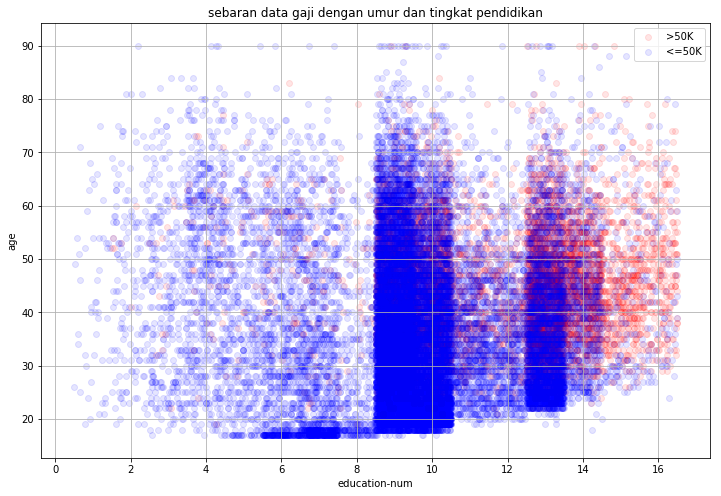

In [22]:
df['education-num_rand']=df['education-num'] + np.random.uniform(-0.5,0.5,len(df))
plt.figure(figsize=(12,8))
plt.scatter(
    df[df['salary']=='>50K']['education-num_rand'],
    df[df['salary']=='>50K']['age'],
    alpha=0.1,
    label='>50K',
    color='r'
    )
plt.scatter(
    df[df['salary']=='<=50K']['education-num_rand'],
    df[df['salary']=='<=50K']['age'],
    alpha=0.1,
    label='<=50K',
    color='b'
    )

plt.xlabel('education-num')
plt.ylabel('age')

plt.legend()
plt.grid()
plt.title('sebaran data gaji dengan umur dan tingkat pendidikan')
plt.show()

In [23]:
from sklearn.feature_extraction import DictVectorizer
vec= DictVectorizer()
features=vec.fit_transform(
                    df.dropna()\
                    .drop('capital-gain', axis=1)\
                    .drop('capital-loss', axis=1)\
                    .drop('salary', axis=1)\
                    .drop('fnlwgt', axis=1)\
                    .to_dict(orient='records')).toarray()

result=df['salary']=='>50K'
X_train=features[1000:]
Y_train=result[1000:]
X_test=features[:1000]
Y_test=result[:1000]    

In [57]:
df.to_dict(orient='records')[25]

{'age': 56,
 'workclass': 'Local-gov',
 'fnlwgt': 216851,
 'education': 'Bachelors',
 'education-num': 13,
 'marital-status': 'Married-civ-spouse',
 'occupation': 'Tech-support',
 'relationship': 'Husband',
 'race': 'White',
 'sex': 'Male',
 'capital-gain': 0,
 'capital-loss': 0,
 'hours-per-week': 40,
 'native-country': 'United-States',
 'salary': '>50K',
 'education-num_rand': 13.217636302161992,
 'prediction': 1.0}

# train clasification model using kNN algorithm

In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier().fit(X_train,Y_train)

# prediksi

In [73]:
predictions= knn.predict(X_test)
accuracy=predictions==Y_test
print("Accuracy: %s%%" % (round(np.average(accuracy)*100)))
print("\n contoh data")
for a in range(10):
    print("prediksi: %s is %s" % (predictions[a],predictions[a]==Y_test[a]))

Accuracy: 81.0%

 contoh data
prediksi: False is True
prediksi: False is True
prediksi: False is True
prediksi: False is True
prediksi: True is False
prediksi: True is False
prediksi: False is True
prediksi: True is True
prediksi: False is False
prediksi: True is True


In [77]:
from sklearn.metrics import classification_report

target=["<=50K",">50K"]
for k in range(1,15):
    for method in ["uniform", "distance"]:
        knn=KNeighborsClassifier(n_neighbors=k,weights=method).fit(X_train, Y_train)
        predictions=knn.predict(X_test)
        accuracy=predictions==Y_test
        print("Accuracy: %s%%, Neighbors: %s, weights: %s" % (round(np.average(accuracy)*100),k,method))
        actual=pd.Series(Y_test).map({True:1,False:0})
        predictions=pd.Series(predictions).map({True:1,False:0})
        print(classification_report(actual.values,predictions.values,target_names=target))

Accuracy: 78.0%, Neighbors: 1, weights: uniform
              precision    recall  f1-score   support

       <=50K       0.87      0.84      0.85       768
        >50K       0.52      0.56      0.54       232

    accuracy                           0.78      1000
   macro avg       0.69      0.70      0.70      1000
weighted avg       0.79      0.78      0.78      1000

Accuracy: 78.0%, Neighbors: 1, weights: distance
              precision    recall  f1-score   support

       <=50K       0.87      0.84      0.85       768
        >50K       0.52      0.56      0.54       232

    accuracy                           0.78      1000
   macro avg       0.69      0.70      0.70      1000
weighted avg       0.79      0.78      0.78      1000

Accuracy: 80.0%, Neighbors: 2, weights: uniform
              precision    recall  f1-score   support

       <=50K       0.83      0.93      0.88       768
        >50K       0.62      0.39      0.48       232

    accuracy                         

Accuracy: 83.0%, Neighbors: 12, weights: uniform
              precision    recall  f1-score   support

       <=50K       0.87      0.91      0.89       768
        >50K       0.66      0.55      0.60       232

    accuracy                           0.83      1000
   macro avg       0.76      0.73      0.75      1000
weighted avg       0.82      0.83      0.82      1000

Accuracy: 82.0%, Neighbors: 12, weights: distance
              precision    recall  f1-score   support

       <=50K       0.87      0.89      0.88       768
        >50K       0.62      0.57      0.59       232

    accuracy                           0.82      1000
   macro avg       0.75      0.73      0.74      1000
weighted avg       0.81      0.82      0.82      1000

Accuracy: 83.0%, Neighbors: 13, weights: uniform
              precision    recall  f1-score   support

       <=50K       0.88      0.90      0.89       768
        >50K       0.65      0.60      0.63       232

    accuracy                      

In [78]:
knn=KNeighborsClassifier(n_neighbors=20, weights='uniform').fit(X_train,Y_train)
predictions=knn.predict(X_test)
actual=pd.Series(Y_test).map({True:1,False:0})
predictions=pd.Series(predictions).map({True:1,False:0})
target=['<=50K','>50K']
# print(classification_report(actual.values,predictions.values,target_names=target))
df['prediction']=pd.Series(predictions)

In [85]:
person={
    'age':56,
    'education':'Doctorate',
    'education-num':16,
    'hours-per-week':50,
    'marital-status':'married',
    'native-country':'United-States',
    'occupation':'Prof-specialty',
    'race':'White',
    'relationship':'Husband',
    'sex':'Male',
    'workclass':'private'
}
person_features=vec.transform(person).toarray()
prediction=knn.predict(person_features)[0]
labels={True:'diatas 50 K', False:'dibawah 50 K'}
print(labels[prediction])

diatas 50 K
